<a href="https://colab.research.google.com/github/gre1wy/mmrokz/blob/main/homework8/part1/Homework81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prac 08.1

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 759.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 100.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [ ]:
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.19.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


/tmp/ipython-input-2401666654.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


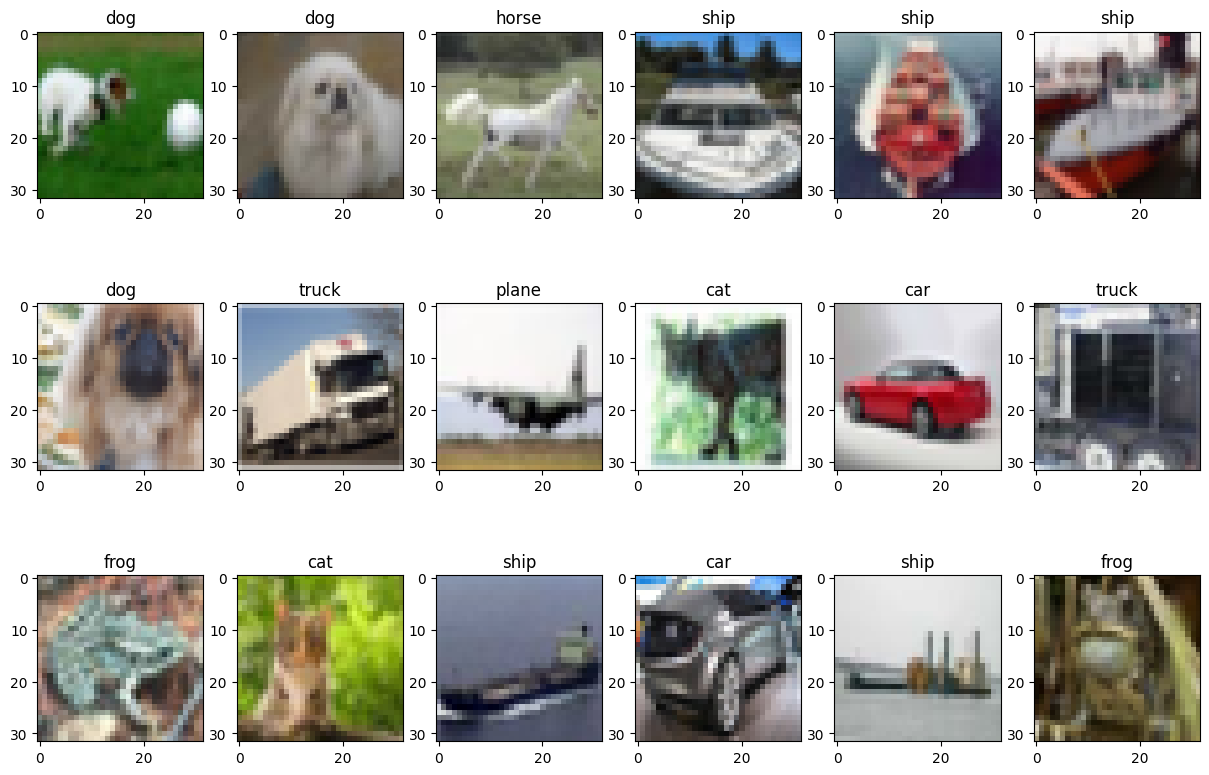

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class Distribution in CIFAR-10'), Text(0, 0.5, 'Counts'))

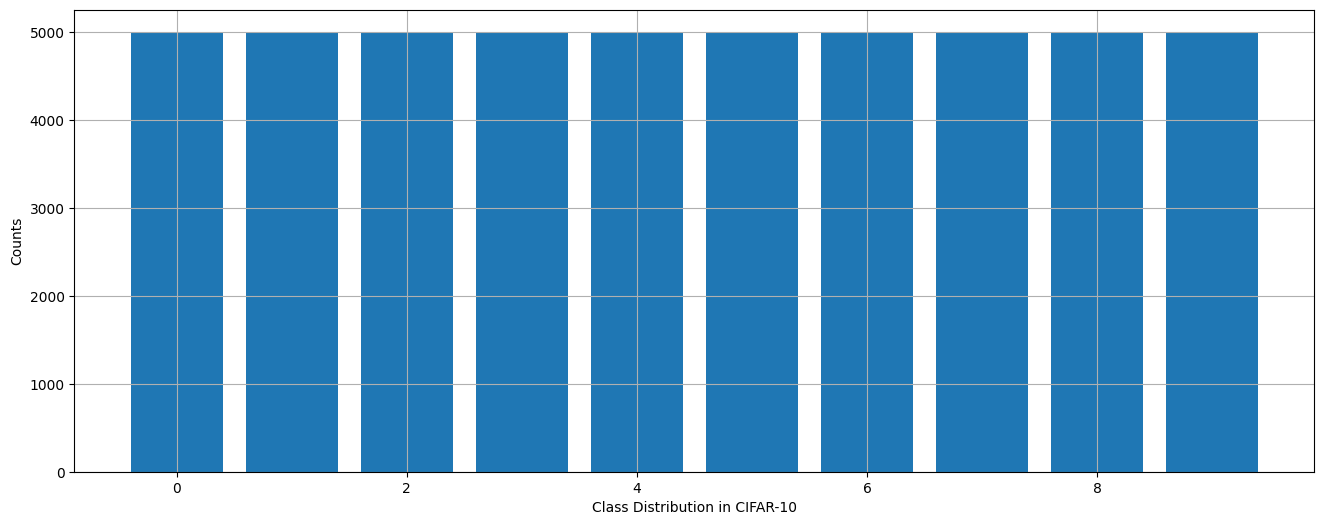

In [ ]:
# Compute the class histogram
from collections import Counter
ids = y_train.flatten()
hist = Counter(ids)

plt.figure(figsize=(16, 6))
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Class Distribution in CIFAR-10'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Dropout(0.4),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Show the model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       327,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,778 (1.27 MB)

 Trainable params: 332,778 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3993 - loss: 1.6889 - val_accuracy: 0.5541 - val_loss: 1.2683
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5863 - loss: 1.1889 - val_accuracy: 0.5982 - val_loss: 1.1455
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6348 - loss: 1.0546 - val_accuracy: 0.6190 - val_loss: 1.0984
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6657 - loss: 0.9657 - val_accuracy: 0.6310 - val_loss: 1.0678
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6929 - loss: 0.9029 - val_accuracy: 0.6275 - val_loss: 1.0709
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7085 - loss: 0.8530 - val_accuracy: 0.6339 - val_loss: 1.0724
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7213 - loss: 0.8065 - val_accuracy: 0.6419 - val_loss: 1.0562
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7378 - loss: 0.7654 - val_accuracy: 

Train Acc      0.8450800180435181
Validation Acc 0.6431999802589417


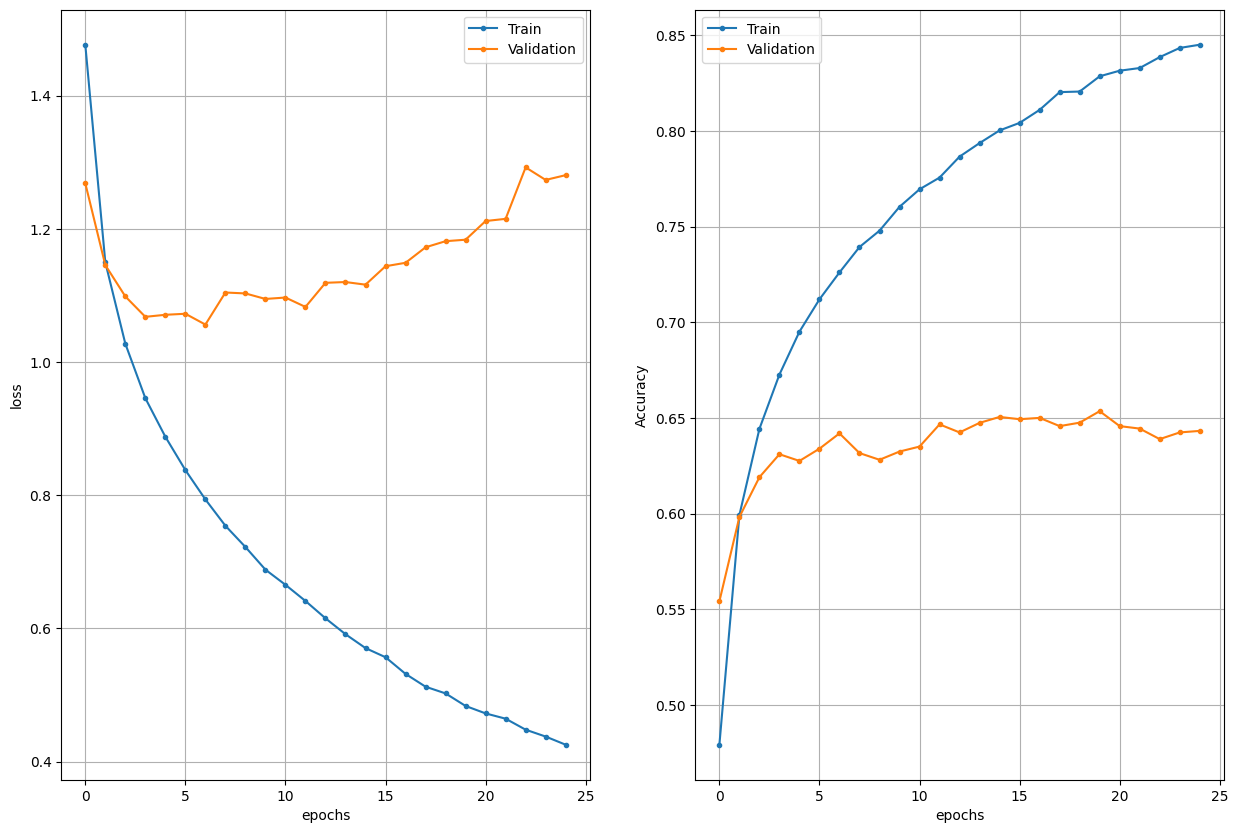

In [ ]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [ ]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = (y_true == class_id)
    acc = np.mean(y_pred[mask] == y_true[mask])
    print(f"{class_name:>8s}: {acc:.3f}")

   plane: 0.701
     car: 0.801
    bird: 0.418
     cat: 0.406
    deer: 0.631
     dog: 0.599
    frog: 0.674
   horse: 0.725
    ship: 0.769
   truck: 0.708


In [ ]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6450 - loss: 1.2575
Test loss   1.2805200815200806
Test metric 0.6431999802589417


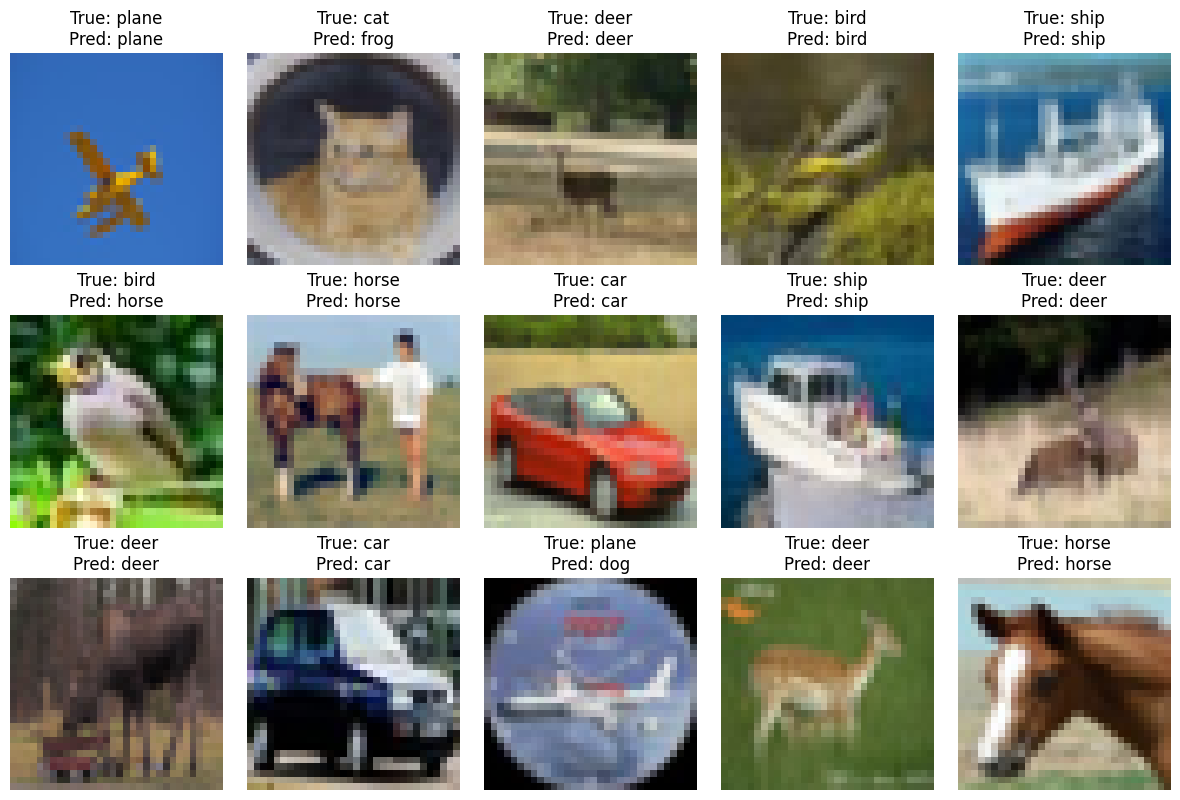

In [ ]:
# Show random samples
plt.figure(figsize=(12, 8))
for ii in range(15):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(3, 5, ii + 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {classes[y_true[idx]]}\nPred: {classes[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout(h_pad=2)
plt.show()

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

In [ ]:
model2 = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    Dropout(0.4),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Show the model
model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       655,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 678,954 (2.59 MB)

 Trainable params: 678,954 (2.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 25
batch_size = 128

# Compile the model
model2.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Train the model
history2 = model2.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.3518 - loss: 1.8398 - val_accuracy: 0.5574 - val_loss: 1.2571
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5848 - loss: 1.1801 - val_accuracy: 0.6332 - val_loss: 1.0650
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6614 - loss: 0.9817 - val_accuracy: 0.6478 - val_loss: 1.0097
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7075 - loss: 0.8516 - val_accuracy: 0.6503 - val_loss: 1.0126
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7412 - loss: 0.7524 - val_accuracy: 0.6653 - val_loss: 1.0019
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7710 - loss: 0.6609 - val_accuracy: 0.6725 - val_loss: 1.0149
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7975 - loss: 0.5866 - val_accuracy: 0.6576 - val_loss: 1.1100
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8225 - loss: 0.5121 - val_acc

Train Acc      0.9458000063896179
Validation Acc 0.6593000292778015


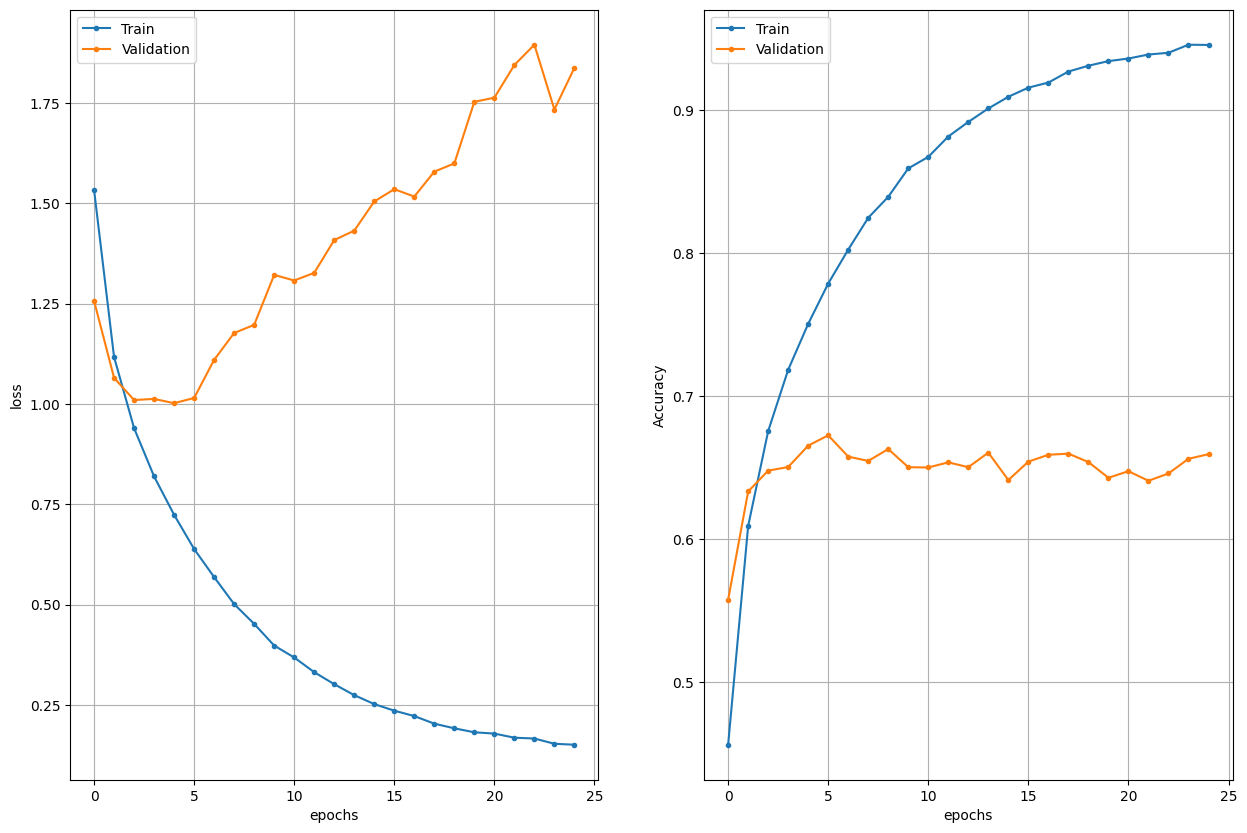

In [ ]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history2.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [ ]:
ev = model2.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6601 - loss: 1.8222
Test loss   1.8374308347702026
Test metric 0.6593000292778015
